<a href="https://colab.research.google.com/github/Pavan164-ml/The-Sparks-Foundation-Taks/blob/main/Pavan_Kumar_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Students score based on number of hours studied using Regression models.

In [ ]:
# Import all necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error 
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the data set 

link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


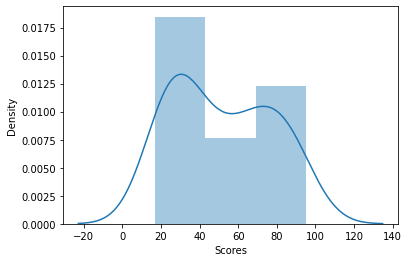

In [ ]:
sns.distplot(data['Scores'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


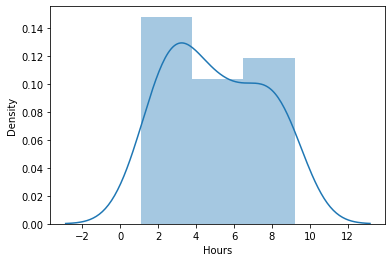

In [ ]:
sns.distplot(data['Hours'])

# Bivariate ana;ysis

Text(0.5, 1.0, 'No. of Hours Vs Scores')

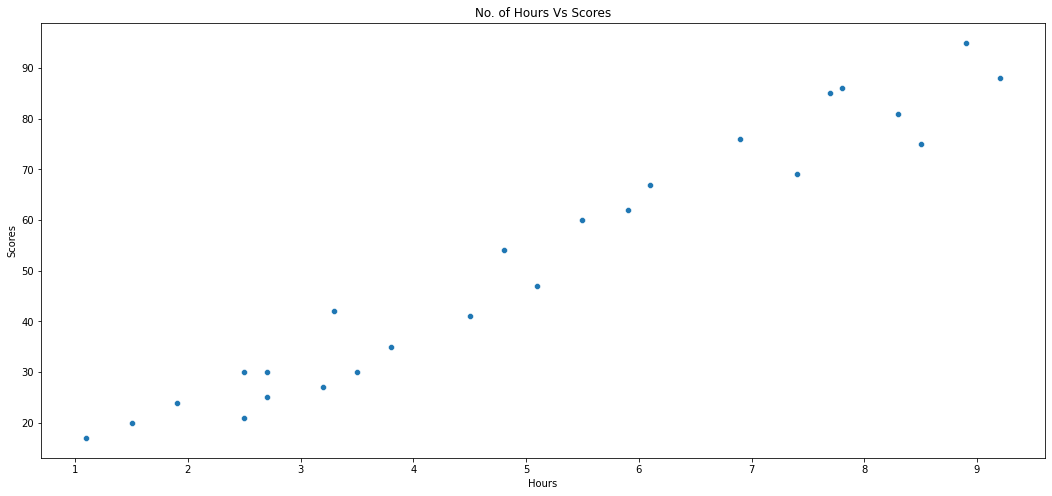

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x=data['Hours'],y=data['Scores'])
plt.title("No. of Hours Vs Scores")

### Splitting the data into training and test samples

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train ,X_test, y_train , y_test = train_test_split(X , y , test_size=0.3 )

In [ ]:
samples = [X_train ,y_train , X_test , y_test]

for i in samples:
  print(i.shape)



(17, 1)
(17,)
(8, 1)
(8,)


## Training the model

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

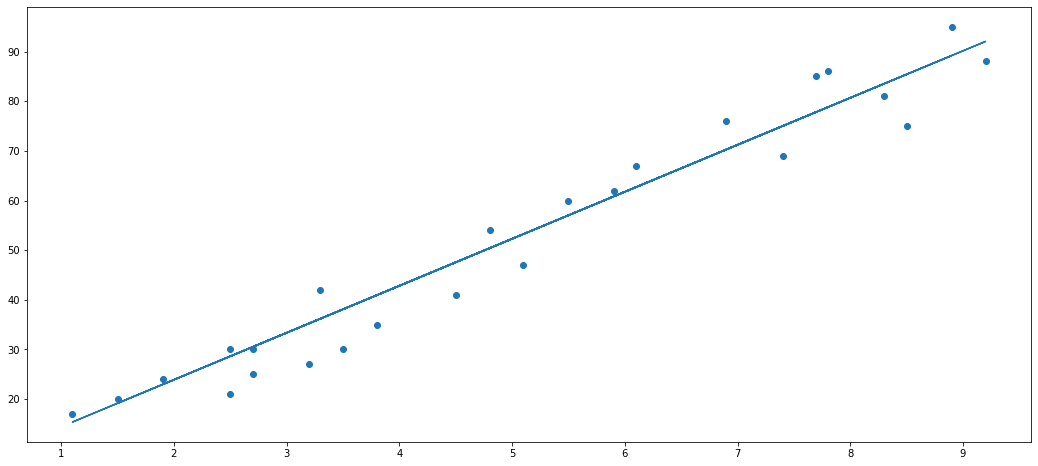

In [ ]:
# Plotting the regression line of prediction by the formula y = mx + c

plt.figure(figsize=(18,8))
reg_line = reg.coef_ * X + reg.intercept_

plt.scatter(X, y)

plt.plot(X, reg_line);


## Making Prediction using X_test

In [ ]:
print(X_test) # Printing the data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

diff = abs(y_test - y_pred)

[[2.7]
 [1.9]
 [3.5]
 [2.5]
 [5.9]
 [5.5]
 [2.7]
 [4.5]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred , 'Difference': diff})  
sum  =df['Difference'].sum()
print(sum)
df.head()

40.59


,Actual,Predicted,Difference
0,30,30.03,0.03
1,24,21.47,2.53
2,30,37.08,7.08
3,21,30.03,9.03
4,62,62.59,0.59


# The actual Task

In [ ]:
hours = [[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.50421429660113


#### So for a student studying for 9.25 hours he might score upto 93.80 % in his next exam

# Evaluating Linear Regression Model


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.196292485901539


# Training with Random Forest regressor

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)

diff = abs(y_test - y_pred1)
sum  =df['Difference'].sum()
print(sum)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred , 'Difference': diff})  
df 

40.44


,Actual,Predicted,Difference
0,30,29.83,1.24
1,24,22.20,0.96
2,30,36.93,7.42
3,21,29.83,9.94
4,62,62.92,1.37
5,60,52.18,6.73
6,25,29.83,6.24
7,41,50.14,8.06


In [ ]:
hours = [[9.25]]
own_pred = rf.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 88.74


# Evaluating Random Forest Regressor model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.07375


## So Linear regression model is perfoming well with this kind of linear data when compared with complex ensemble model like Random Forest Regressor

## Thank you